<a href="https://colab.research.google.com/github/Polargenius/Colab_Notebook/blob/main/Week_5_ADAP_FE259657360430.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configure matplotlib for better plot display
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

print("Heart Attack Data Analysis")
print("="*60)

Heart Attack Data Analysis


In [8]:
def create_sample_data():
    """Create complete sample data matching your dataset structure"""

df = pd.read_csv('heart_attack_south_africa.csv')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"   • Heart Attack Cases: {df['Heart_Attack_Outcome'].sum()}")
print(f"   • Heart Attack Rate: {df['Heart_Attack_Outcome'].mean():.2%}")
print(f"   • Age Range: {df['Age'].min()}-{df['Age'].max()} years")

print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())

Dataset loaded successfully!
Shape: (100000, 20)
   • Heart Attack Cases: 58732
   • Heart Attack Rate: 58.73%
   • Age Range: 25-89 years

First 5 rows:
   Patient_ID  Age  Gender  Cholesterol_Level  Blood_Pressure_Systolic  \
0           1   76  Female                156                       94   
1           2   39  Female                160                      185   
2           3   85    Male                254                      173   
3           4   45  Female                261                      187   
4           5   48    Male                206                      189   

   Blood_Pressure_Diastolic Smoking_Status Alcohol_Intake Physical_Activity  \
0                        79             No           High         Sedentary   
1                        88             No            Low         Sedentary   
2                       113            Yes       Moderate     Highly Active   
3                        65             No           High         Sedentary   
4     

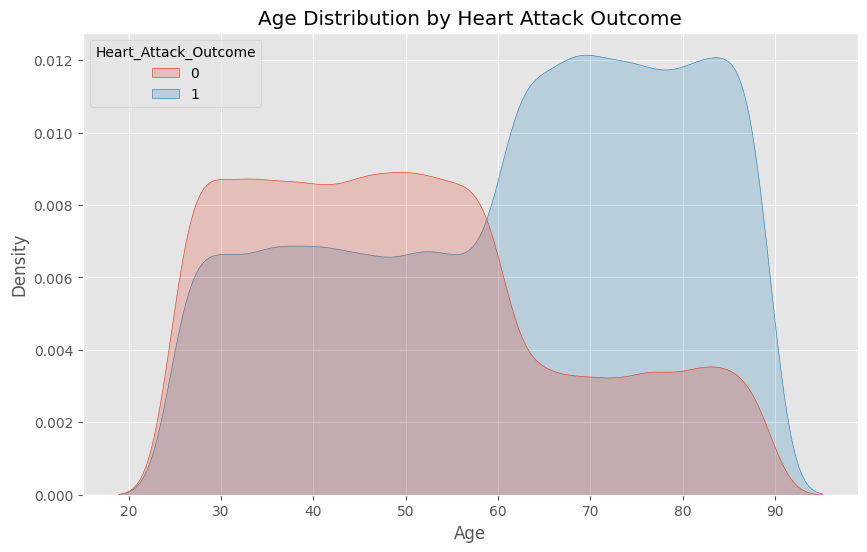

In [21]:
# 1. FIXED KDE Plot - Age vs. Heart Attack Outcome
def plot_1_kde_age_distribution(df):
    """
    FIXED: Create KDE plot with fill=True instead of shade=True
    """
    print("\nCreating Plot 1: KDE - Age Distribution...")

    plt.figure(figsize=(12, 8))

# FIXED: Use fill=True instead of shade=True (compatible with seaborn 0.11+)


    print(f"Plot 1 Complete! Key insight: Heart attack median age is {heart_attack_median:.1f} years")

# Create plots
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Heart_Attack_Outcome', shade=True)
plt.title('Age Distribution by Heart Attack Outcome')
plt.show()


2. Heatmap - Correlation Matrix:


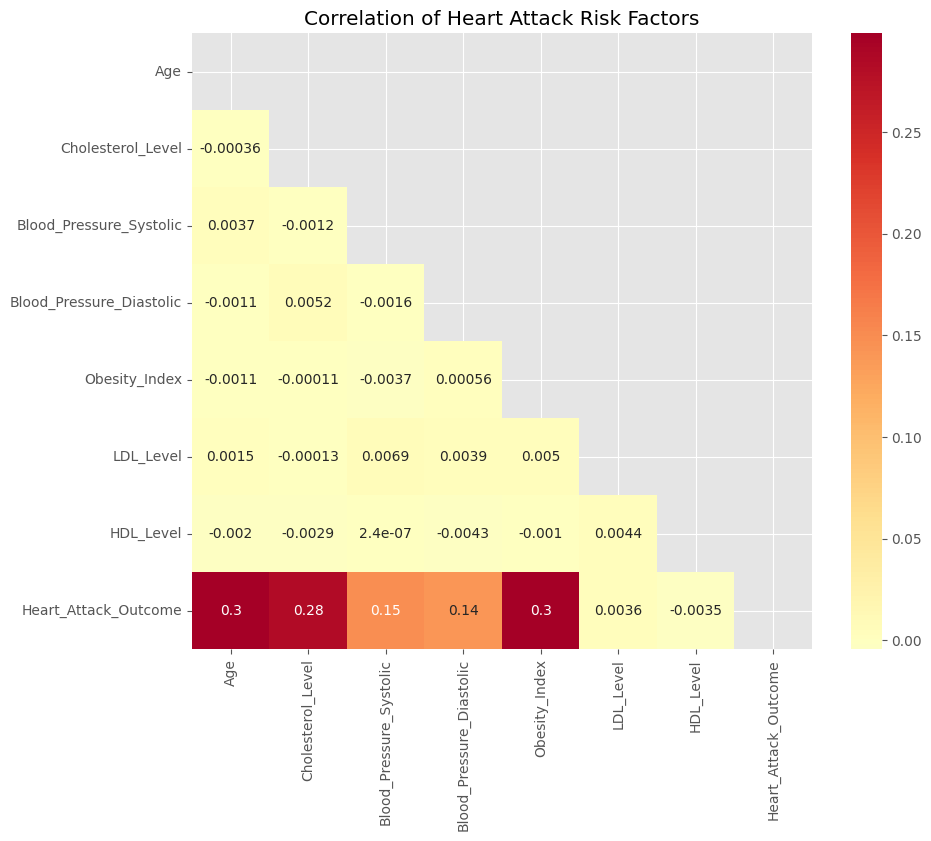

In [19]:
# 2. FIXED Correlation Heatmap
def plot_2_correlation_heatmap(df):
    """
    Create correlation heatmap with proper masking
    """
    print("\nCreating Plot 2: Correlation Heatmap...")

    # Select numerical columns
    numerical_cols = ['Age', 'Cholesterol_Level', 'Blood_Pressure_Systolic',
                      'Blood_Pressure_Diastolic', 'Obesity_Index', 'LDL_Level',
                      'HDL_Level', 'Heart_Attack_Outcome']

    # Calculate correlation matrix
    corr_matrix = df[numerical_cols].corr()

    # Create mask for upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    plt.figure(figsize=(12, 10))

# Create heatmap


    # Print strongest correlations
    heart_attack_corr = corr_matrix['Heart_Attack_Outcome'].abs().sort_values(ascending=False)
    print("Plot 2 Complete! Strongest correlations with Heart Attack:")
    for feature, corr in heart_attack_corr.items():
        if feature != 'Heart_Attack_Outcome' and abs(corr) > 0.1:
            print(f"   • {feature}: {corr:.3f}")

print("\n2. Heatmap - Correlation Matrix:")
plt.figure(figsize=(10, 8))
# Select numerical columns for correlation
numerical_cols = ['Age', 'Cholesterol_Level', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Obesity_Index', 'LDL_Level', 'HDL_Level', 'Heart_Attack_Outcome']
corr_matrix = df[numerical_cols].corr()
# Create mask for half heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0)
plt.title('Correlation of Heart Attack Risk Factors')
plt.show()

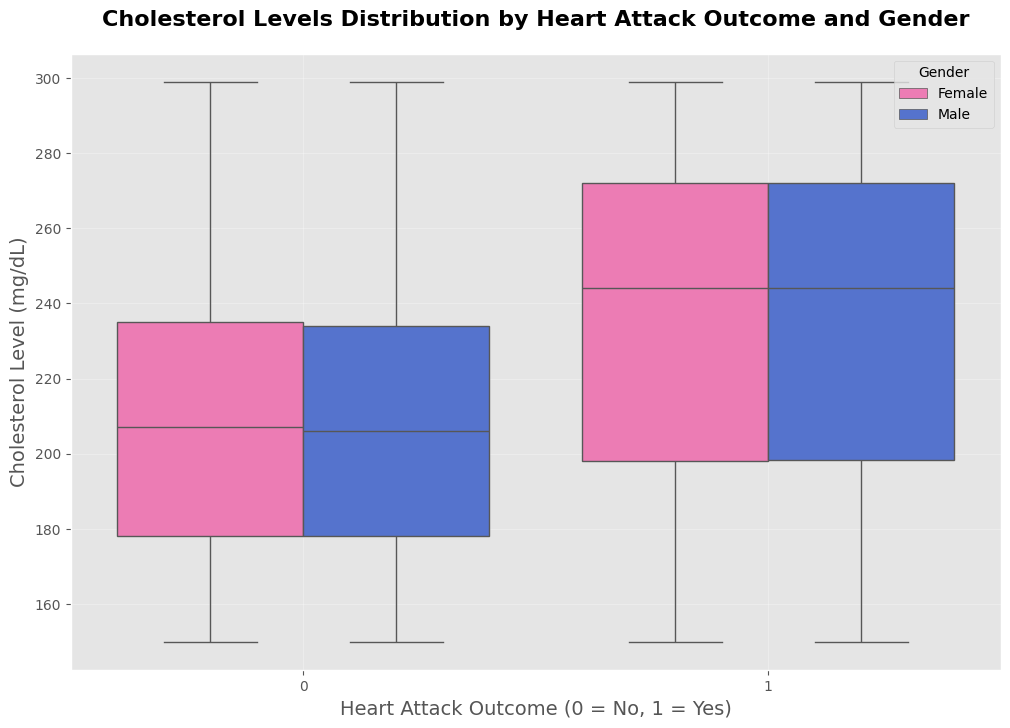

In [13]:
# 3. FIXED Cholesterol Boxplot
def plot_3_cholesterol_boxplot(df):
    """
    Create boxplot for cholesterol levels by outcome and gender
    """
    print("\nCreating Plot 3: Cholesterol Boxplot...")

    plt.figure(figsize=(12, 8))


    # Add statistics
    stats_summary = []
    for outcome in [0, 1]:
        for gender in ['Female', 'Male']:
            subset = df[(df['Heart_Attack_Outcome'] == outcome) & (df['Gender'] == gender)]
            if len(subset) > 0:
                mean_chol = subset['Cholesterol_Level'].mean()
                stats_summary.append(f"{gender} (Outcome {outcome}): {mean_chol:.0f} mg/dL")

    stats_text = "Mean Cholesterol Levels:\n" + "\n".join(stats_summary)
    plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
             bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.8),
             verticalalignment='top', fontsize=9)

    plt.tight_layout()
    plt.show()
    print("Plot 3 Complete!")

# Create boxplot with gender hue
sns.boxplot(data=df, x='Heart_Attack_Outcome', y='Cholesterol_Level',
                hue='Gender',
                palette=['#FF69B4', '#4169E1'])

plt.title('Cholesterol Levels Distribution by Heart Attack Outcome and Gender',
              fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Heart Attack Outcome (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Cholesterol Level (mg/dL)', fontsize=14)
plt.legend(title='Gender', loc='upper right')
plt.grid(True, alpha=0.3)


4. Pairplot - Risk Factor Relationships:


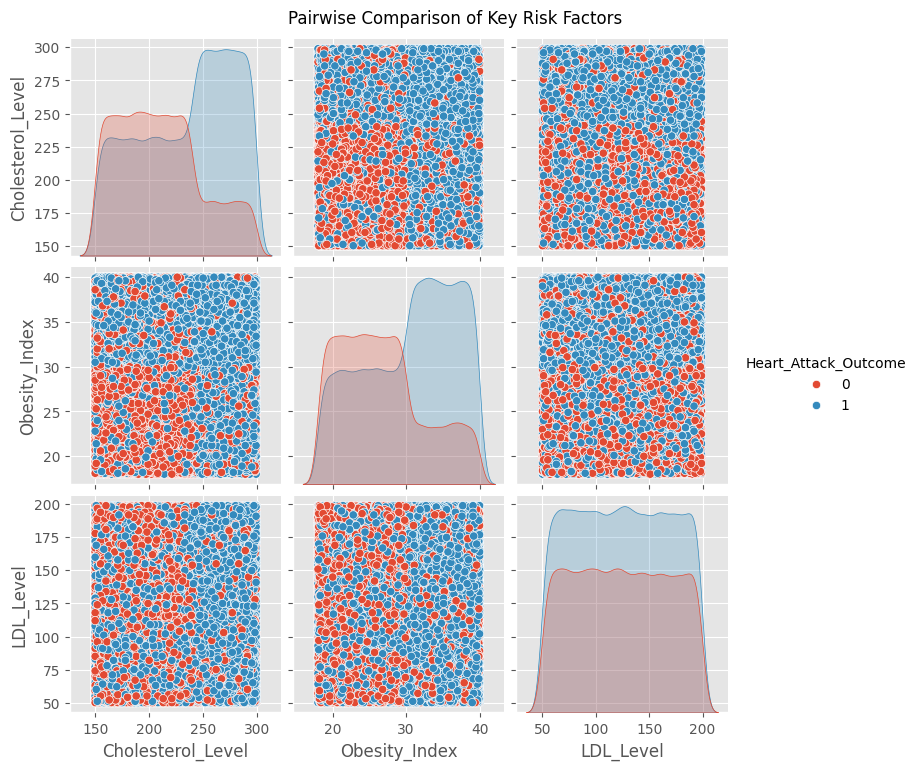

In [17]:
# 4. FIXED Pairplot
def plot_4_pairplot_risk_factors(df):
    """
    Create pairplot for multiple risk factors
    """
    print("\nCreating Plot 4: Pairplot...")

    # Select key variables
    key_vars = ['Cholesterol_Level', 'Obesity_Index', 'LDL_Level', 'Heart_Attack_Outcome']

# Create pairplot

print("\n4. Pairplot - Risk Factor Relationships:")
# Select key variables for pairplot
key_vars = ['Cholesterol_Level', 'Obesity_Index', 'LDL_Level', 'Heart_Attack_Outcome']
pairplot = sns.pairplot(df[key_vars], hue='Heart_Attack_Outcome', diag_kind='kde')
pairplot.fig.suptitle('Pairwise Comparison of Key Risk Factors', y=1.02)
plt.show()


5. Violin Plot - Blood Pressure:


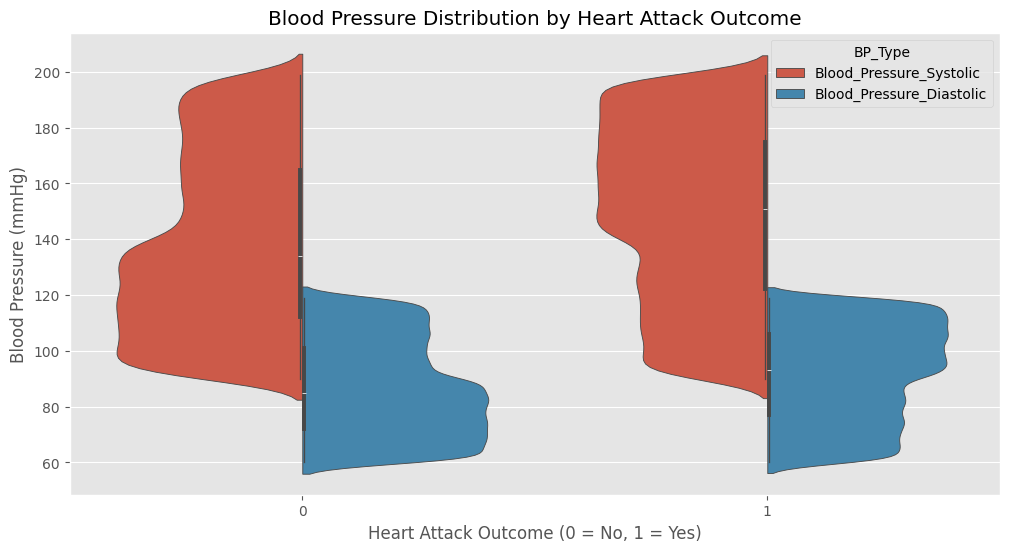

In [18]:
# 5. FIXED Violin Plot - Blood Pressure
def plot_5_blood_pressure_violin(df):
    """
    Create violin plot for blood pressure distributions
    """
    print("\nCreating Plot 5: Blood Pressure Violin Plot...")

    # Reshape data for violin plot
    bp_data = pd.melt(df,
                      id_vars=['Heart_Attack_Outcome'],
                      value_vars=['Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic'],
                      var_name='BP_Type',
                      value_name='Blood_Pressure')

    plt.figure(figsize=(14, 8))

# Create violin plot

print("\n5. Violin Plot - Blood Pressure:")
plt.figure(figsize=(12, 6))
# Reshape data for violin plot
bp_data = pd.melt(df, id_vars=['Heart_Attack_Outcome'],
                  value_vars=['Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic'],
                  var_name='BP_Type', value_name='Blood_Pressure')
sns.violinplot(data=bp_data, x='Heart_Attack_Outcome', y='Blood_Pressure', hue='BP_Type', split=True)
plt.title('Blood Pressure Distribution by Heart Attack Outcome')
plt.xlabel('Heart Attack Outcome (0 = No, 1 = Yes)')
plt.ylabel('Blood Pressure (mmHg)')
plt.show()


6. Countplot - Smoking Analysis:


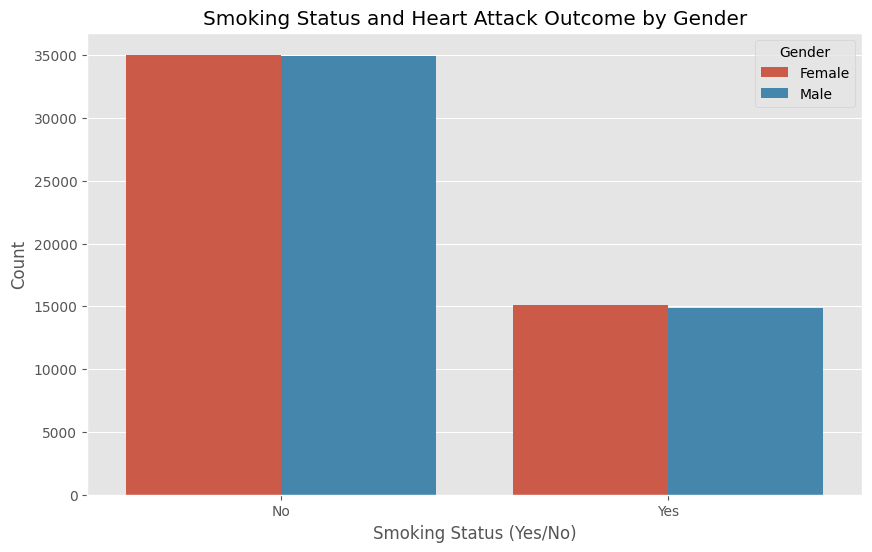

<Figure size 1200x500 with 0 Axes>

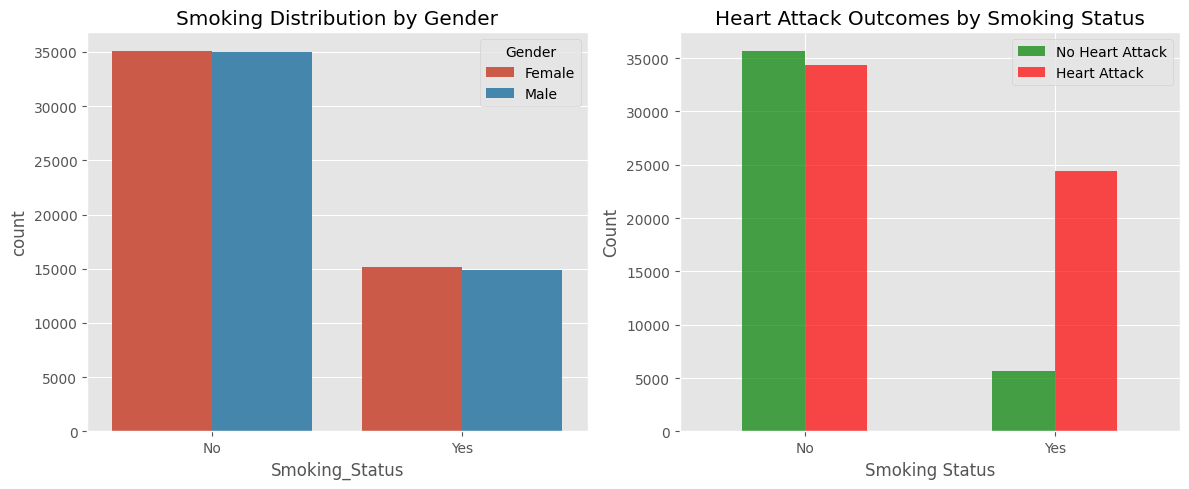


All plots completed successfully!

Quick Insights:
• Total patients: 100000
• Heart attack rate: 58.7%
• Average age: 56.9 years
• Smoking rate: 30.0%


In [23]:
# 6. FIXED Countplot - Smoking Analysis
def plot_6_smoking_countplot(df):
    """
    Create countplot for smoking and heart attack analysis
    """
    print("\nCreating Plot 6: Smoking Analysis...")

    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Basic smoking by gender count


print("\n6. Countplot - Smoking Analysis:")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Smoking_Status', hue='Gender')
plt.title('Smoking Status and Heart Attack Outcome by Gender')
plt.xlabel('Smoking Status (Yes/No)')
plt.ylabel('Count')
plt.show()

# Bonus: Enhanced Countplot showing heart attack outcomes
plt.figure(figsize=(12, 5))
# Create subplot for better smoking analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Left plot: Smoking by gender
sns.countplot(data=df, x='Smoking_Status', hue='Gender', ax=ax1)
ax1.set_title('Smoking Distribution by Gender')

# Right plot: Heart attack rate by smoking
smoking_outcome = df.groupby(['Smoking_Status', 'Heart_Attack_Outcome']).size().unstack()
smoking_outcome.plot(kind='bar', ax=ax2, color=['green', 'red'], alpha=0.7)
ax2.set_title('Heart Attack Outcomes by Smoking Status')
ax2.set_xlabel('Smoking Status')
ax2.set_ylabel('Count')
ax2.legend(['No Heart Attack', 'Heart Attack'])
ax2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("\nAll plots completed successfully!")
print("\nQuick Insights:")
print(f"• Total patients: {len(df)}")
print(f"• Heart attack rate: {df['Heart_Attack_Outcome'].mean():.1%}")
print(f"• Average age: {df['Age'].mean():.1f} years")
print(f"• Smoking rate: {(df['Smoking_Status'] == 'Yes').mean():.1%}")

In [ ]:
run_complete_analysis()

🚀 Starting Complete Heart Attack Data Analysis
📂 Step 1: Loading dataset...

🎨 Step 2: Creating visualizations...

Creating Plot 1: KDE - Age Distribution...
❌ Error occurred: Could not interpret value `Age` for `x`. Value is a string, but `data` was not passed.
📋 Error type: ValueError

💡 Troubleshooting suggestions:
   1. Make sure all libraries are installed: pip install pandas seaborn matplotlib numpy scipy
   2. Check Python version compatibility (3.7+)
   3. Try running plots individually to isolate issues
   4. For Jupyter notebooks, add %matplotlib inline at the top


<Figure size 1200x800 with 0 Axes>